In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Train Test Split
from sklearn.model_selection import train_test_split


data_train =pd.read_csv("data/train_agnews.csv")
X = data_train.iloc[:,2] + data_train.iloc[:,1]
y = data_train.iloc[:,0].apply(lambda x: x-1) 

data_test =pd.read_csv("data/test_agnews.csv")
X_test = data_test.iloc[:,2] + data_test.iloc[:,1]
y_test = data_test.iloc[:,0].apply(lambda x: x-1) 

X_train, X_val, y_train, y_val = train_test_split(X, y)
## Finding the max no of words in a sentence in complete data set 


lengths = [len(a.split()) for a in X_train]

# Sentence length distribution

(array([2.9400e+03, 4.6276e+04, 3.7402e+04, 2.6840e+03, 4.6000e+02,
        1.3700e+02, 6.5000e+01, 2.6000e+01, 7.0000e+00, 3.0000e+00]),
 array([  3. ,  20.3,  37.6,  54.9,  72.2,  89.5, 106.8, 124.1, 141.4,
        158.7, 176. ]),
 <BarContainer object of 10 artists>)

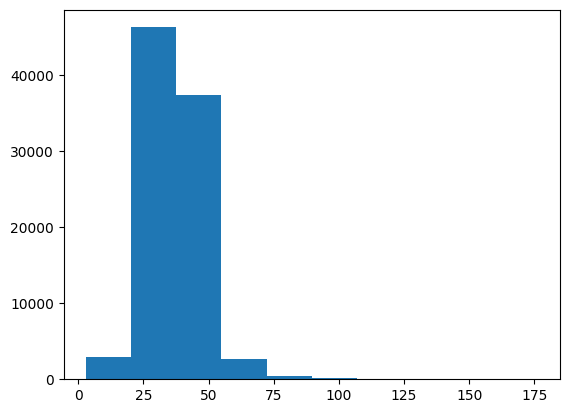

In [3]:
plt.hist(lengths)

# Tokenization

In [4]:
max_len = 80 
vocabulary_size = 10000 # random value
embed_size      = 32    # random value 

tok = Tokenizer(num_words=vocabulary_size)
tok.fit_on_texts(X_train.values)


# Token 
X_train = tok.texts_to_sequences(X_train)
X_val = tok.texts_to_sequences(X_val)
X_test = tok.texts_to_sequences(X_test)

# Now we need to pad all the sequences based on the max value 

X_train = pad_sequences(X_train, maxlen=max_len)
X_val = pad_sequences(X_val, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Visualisation of some sentences

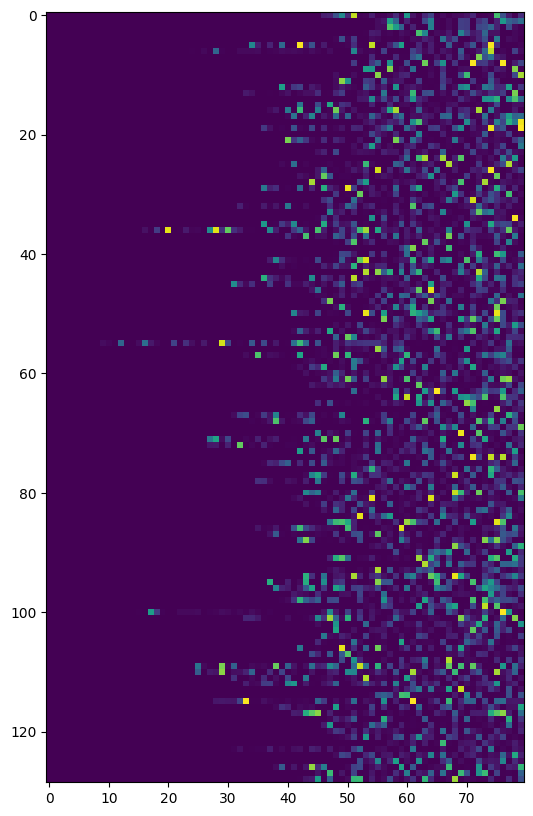

In [5]:
plt.figure(figsize=(10,10))
i=35
plt.imshow(X_train[129*i:129*(i+1)])


# Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt

#Text Color
from termcolor import colored


#Model Evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

#Deep Learning
import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional

from tensorflow.keras.layers import Embedding


### Model found on kaggle 

In [7]:
# Implementing a sequential model

model = Sequential()
model.add(Embedding(vocabulary_size,embed_size,input_length = max_len)) #input layer is embedding layer
model.add(Bidirectional(LSTM(128, return_sequences=True)))              # Bidirectinal LSTM
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(GlobalMaxPooling1D())                                         # Flattening layer to reduce everything in a vector form
model.add(Dense(256, activation='relu'))                                                  # Dense layer
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.25))                                                # doing regularization in Neural Network
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax')) 

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']             
             )

In [9]:
model.fit(X_train,y_train,batch_size=256,validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
352/352 [==============================] - 312s 872ms/step - loss: 0.5681 - accuracy: 0.7601 - val_loss: 0.3045 - val_accuracy: 0.9013
Epoch 2/10
352/352 [==============================] - 400s 1s/step - loss: 0.2773 - accuracy: 0.9134 - val_loss: 0.2710 - val_accuracy: 0.9111
Epoch 3/10
352/352 [==============================] - 427s 1s/step - loss: 0.2270 - accuracy: 0.9289 - val_loss: 0.2687 - val_accuracy: 0.9108
Epoch 4/10
352/352 [==============================] - 397s 1s/step - loss: 0.1934 - accuracy: 0.9375 - val_loss: 0.2823 - val_accuracy: 0.9084
Epoch 5/10
352/352 [==============================] - 416s 1s/step - loss: 0.1730 - accuracy: 0.9442 - val_loss: 0.2958 - val_accuracy: 0.9029
Epoch 6/10
352/352 [==============================] - 394s 1s/step - loss: 0.1523 - accuracy: 0.9505 - val_loss: 0.2995 - val_accuracy: 0.9033
Epoch 7/10
352/352 [==============================] - 405s 1s/step - loss: 0.1350 - accuracy: 0.9556 - val_loss: 0.3229 - val_accuracy: 0.9

### It's conversion to binary

In [10]:
import BinaryLSTM

model2 = Sequential()
model2.add(Embedding(vocabulary_size,embed_size,input_length = max_len)) #input layer is embedding layer
model2.add(Bidirectional(BinaryLSTM.BinaryLSTM(128, return_sequences=True)))              # Bidirectinal LSTM
model2.add(Bidirectional(BinaryLSTM.BinaryLSTM(64, return_sequences=True)))
model2.add(GlobalMaxPooling1D())                                         # Flattening layer to reduce everything in a vector form
model2.add(Dense(256, activation='relu'))                                                  # Dense layer
model2.add(Dropout(0.25))
model2.add(Dense(128, activation='relu')) 
model2.add(Dropout(0.25))                                                # doing regularization in Neural Network
model2.add(Dense(64, activation='relu')) 
model2.add(Dropout(0.25))
model2.add(Dense(4, activation='softmax')) 
model2.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']             
             )
model2.fit(X_train,y_train,batch_size=256,validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
352/352 [==============================] - 375s 1s/step - loss: 1.3877 - accuracy: 0.2488 - val_loss: 1.3863 - val_accuracy: 0.2498
Epoch 2/10
352/352 [==============================] - 407s 1s/step - loss: 1.3865 - accuracy: 0.2520 - val_loss: 1.3864 - val_accuracy: 0.2498
Epoch 3/10
352/352 [==============================] - 475s 1s/step - loss: 1.3866 - accuracy: 0.2470 - val_loss: 1.3863 - val_accuracy: 0.2484
Epoch 4/10
352/352 [==============================] - 506s 1s/step - loss: 1.1864 - accuracy: 0.3721 - val_loss: 0.9352 - val_accuracy: 0.4810
Epoch 5/10
352/352 [==============================] - 495s 1s/step - loss: 0.7869 - accuracy: 0.5809 - val_loss: 0.5805 - val_accuracy: 0.6944
Epoch 6/10
352/352 [==============================] - 474s 1s/step - loss: 0.4309 - accuracy: 0.8255 - val_loss: 0.3440 - val_accuracy: 0.8864
Epoch 7/10
352/352 [==============================] - 469s 1s/step - loss: 0.2799 - accuracy: 0.9125 - val_loss: 0.2920 - val_accuracy: 0.9059

### Simple model without bidirectional layers, and with less hidden layers

In [11]:
model3 = Sequential()
model3.add(Embedding(vocabulary_size,embed_size,input_length = max_len)) #input layer is embedding layer
model3.add(LSTM(128, return_sequences=True))
model3.add(GlobalMaxPooling1D())                                         # Flattening layer to reduce everything in a vector form                                                # Dense layer
model3.add(Dropout(0.25))
model3.add(Dense(128, activation='relu')) 
model3.add(Dropout(0.25))
model3.add(Dense(4, activation='softmax')) 
model3.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']             
             )
model3.fit(X_train,y_train,batch_size=256,validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
352/352 [==============================] - 100s 280ms/step - loss: 0.5771 - accuracy: 0.7869 - val_loss: 0.3225 - val_accuracy: 0.8940
Epoch 2/10
352/352 [==============================] - 93s 263ms/step - loss: 0.2675 - accuracy: 0.9134 - val_loss: 0.2693 - val_accuracy: 0.9093
Epoch 3/10
352/352 [==============================] - 93s 265ms/step - loss: 0.2134 - accuracy: 0.9310 - val_loss: 0.2673 - val_accuracy: 0.9110
Epoch 4/10
352/352 [==============================] - 93s 263ms/step - loss: 0.1850 - accuracy: 0.9380 - val_loss: 0.2788 - val_accuracy: 0.9086
Epoch 5/10
352/352 [==============================] - 93s 264ms/step - loss: 0.1647 - accuracy: 0.9443 - val_loss: 0.3037 - val_accuracy: 0.9057
Epoch 6/10
352/352 [==============================] - 93s 264ms/step - loss: 0.1496 - accuracy: 0.9484 - val_loss: 0.3130 - val_accuracy: 0.9056
Epoch 7/10
352/352 [==============================] - 93s 264ms/step - loss: 0.1369 - accuracy: 0.9523 - val_loss: 0.3281 - val_a

### Model above binarized

In [12]:
model4 = Sequential()
model4.add(Embedding(vocabulary_size,embed_size,input_length = max_len)) #input layer is embedding layer
model4.add(BinaryLSTM.BinaryLSTM(128, return_sequences=True))
model4.add(GlobalMaxPooling1D())                                         # Flattening layer to reduce everything in a vector form                                                # Dense layer
model4.add(Dropout(0.25))
model4.add(Dense(128, activation='relu')) 
model4.add(Dropout(0.25))
model4.add(Dense(4, activation='softmax')) 
model4.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']             
             )
model4.fit(X_train,y_train,batch_size=256,validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
352/352 [==============================] - 98s 274ms/step - loss: 1.2117 - accuracy: 0.4047 - val_loss: 0.4343 - val_accuracy: 0.8543
Epoch 2/10
352/352 [==============================] - 96s 273ms/step - loss: 0.3860 - accuracy: 0.8750 - val_loss: 0.2984 - val_accuracy: 0.9017
Epoch 3/10
352/352 [==============================] - 96s 273ms/step - loss: 0.2729 - accuracy: 0.9120 - val_loss: 0.2872 - val_accuracy: 0.9020
Epoch 4/10
352/352 [==============================] - 96s 272ms/step - loss: 0.2363 - accuracy: 0.9229 - val_loss: 0.2650 - val_accuracy: 0.9127
Epoch 5/10
352/352 [==============================] - 96s 272ms/step - loss: 0.2080 - accuracy: 0.9323 - val_loss: 0.2636 - val_accuracy: 0.9125
Epoch 6/10
352/352 [==============================] - 96s 272ms/step - loss: 0.1888 - accuracy: 0.9369 - val_loss: 0.2627 - val_accuracy: 0.9114
Epoch 7/10
352/352 [==============================] - 96s 272ms/step - loss: 0.1751 - accuracy: 0.9414 - val_loss: 0.2776 - val_ac

### Simplest model

Used to check if binary networks require more layers to learn a dataset

In [13]:
model5 = Sequential()
model5.add(Embedding(vocabulary_size,embed_size,input_length = max_len)) #input layer is embedding layer
model5.add(LSTM(128, return_sequences=True))
model5.add(GlobalMaxPooling1D())                                         # Flattening layer to reduce everything in a vector form                                                # Dense layer
model5.add(Dropout(0.25))
model5.add(Dense(4, activation='softmax')) 
model5.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']             
             )
model5.fit(X_train,y_train,batch_size=256,validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
352/352 [==============================] - 84s 234ms/step - loss: 0.5819 - accuracy: 0.7739 - val_loss: 0.3092 - val_accuracy: 0.9020
Epoch 2/10
352/352 [==============================] - 80s 227ms/step - loss: 0.2632 - accuracy: 0.9164 - val_loss: 0.2715 - val_accuracy: 0.9100
Epoch 3/10
352/352 [==============================] - 78s 220ms/step - loss: 0.2161 - accuracy: 0.9301 - val_loss: 0.2690 - val_accuracy: 0.9091
Epoch 4/10
352/352 [==============================] - 72s 205ms/step - loss: 0.1896 - accuracy: 0.9375 - val_loss: 0.2751 - val_accuracy: 0.9094
Epoch 5/10
352/352 [==============================] - 72s 205ms/step - loss: 0.1692 - accuracy: 0.9443 - val_loss: 0.2782 - val_accuracy: 0.9080
Epoch 6/10
352/352 [==============================] - 72s 205ms/step - loss: 0.1559 - accuracy: 0.9476 - val_loss: 0.2880 - val_accuracy: 0.9058
Epoch 7/10
352/352 [==============================] - 72s 205ms/step - loss: 0.1416 - accuracy: 0.9526 - val_loss: 0.3073 - val_ac

### Binary version of model above

In [140]:
model6 = Sequential()
model6.add(Embedding(vocabulary_size,embed_size,input_length = max_len)) #input layer is embedding layer
model6.add(BinaryLSTM.BinaryLSTM(128, return_sequences=True))
model6.add(GlobalMaxPooling1D())                                         # Flattening layer to reduce everything in a vector form                                                # Dense layer
model6.add(Dropout(0.25))
model6.add(Dense(4, activation='softmax')) 
model6.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']             
             )
model6.fit(X_train,y_train,batch_size=256,validation_data=(X_val,y_val),epochs=5)

Epoch 1/5
352/352 [==============================] - 82s 227ms/step - loss: 1.0729 - accuracy: 0.5231 - val_loss: 0.3859 - val_accuracy: 0.8753
Epoch 2/5
352/352 [==============================] - 79s 223ms/step - loss: 0.3234 - accuracy: 0.8969 - val_loss: 0.2890 - val_accuracy: 0.9055
Epoch 3/5
352/352 [==============================] - 79s 226ms/step - loss: 0.7281 - accuracy: 0.7298 - val_loss: 0.6008 - val_accuracy: 0.8579
Epoch 4/5
352/352 [==============================] - 79s 226ms/step - loss: 0.4897 - accuracy: 0.8522 - val_loss: 0.5092 - val_accuracy: 0.8106
Epoch 5/5
352/352 [==============================] - 80s 228ms/step - loss: 0.3614 - accuracy: 0.8854 - val_loss: 0.3047 - val_accuracy: 0.8998


# Results

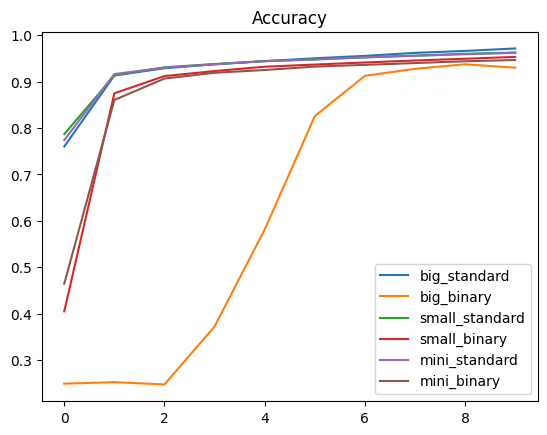

In [15]:
models = [model, model2, model3, model4, model5, model6]
model_names = ["big_standard", "big_binary", "small_standard", "small_binary", "mini_standard", "mini_binary"]
for i in range(len(models)):
    plt.plot(models[i].history.history["accuracy"], label=model_names[i])
plt.title("Accuracy")
plt.legend()
plt.show()

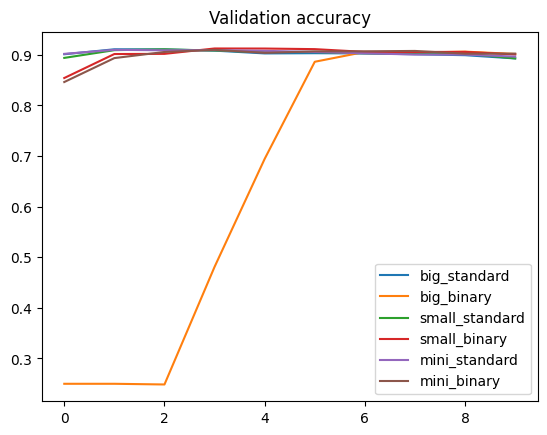

In [16]:
models = [model, model2, model3, model4, model5, model6]
model_names = ["big_standard", "big_binary", "small_standard", "small_binary", "mini_standard", "mini_binary"]
for i in range(len(models)):
    plt.plot(models[i].history.history["val_accuracy"], label=model_names[i])
plt.title("Validation accuracy")
plt.legend()
plt.show()

238/238 [==============================] - 8s 33ms/step
Mean time: 8.196384501457214, average accuracy: 0.8888157894736842


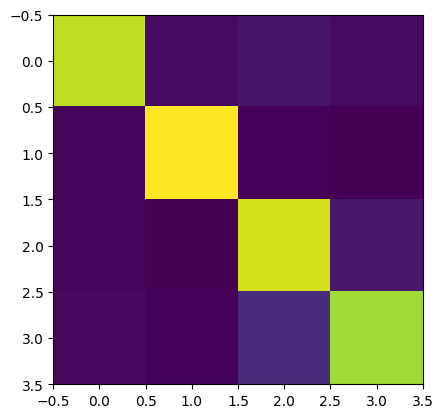

238/238 [==============================] - 8s 34ms/step
Mean time: 8.42265692949295, average accuracy: 0.9001315789473686


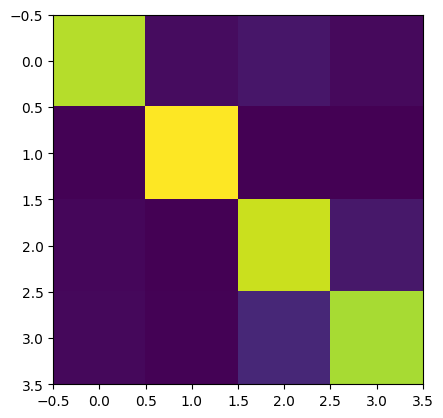

238/238 [==============================] - 4s 15ms/step
Mean time: 3.6310880184173584, average accuracy: 0.8923684210526315


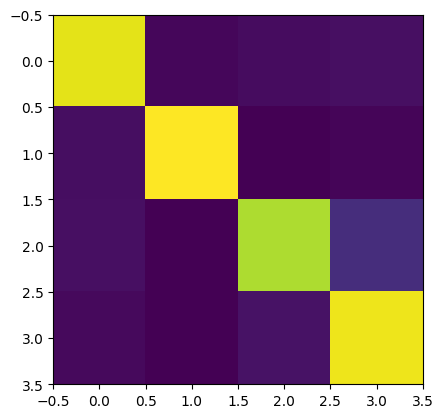

238/238 [==============================] - 4s 16ms/step
Mean time: 3.808523654937744, average accuracy: 0.8977631578947369


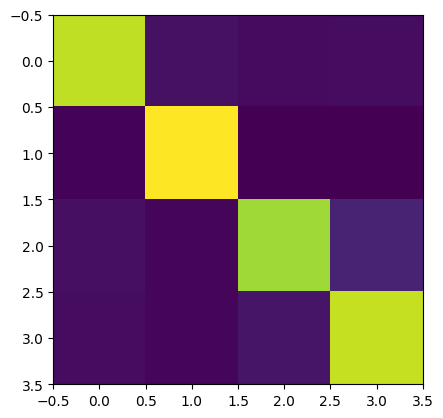

238/238 [==============================] - 3s 14ms/step
Mean time: 3.6028326511383058, average accuracy: 0.8926315789473686


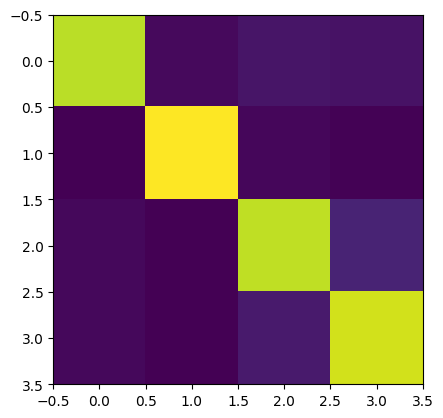

238/238 [==============================] - 4s 16ms/step
Mean time: 3.762303853034973, average accuracy: 0.8985526315789475


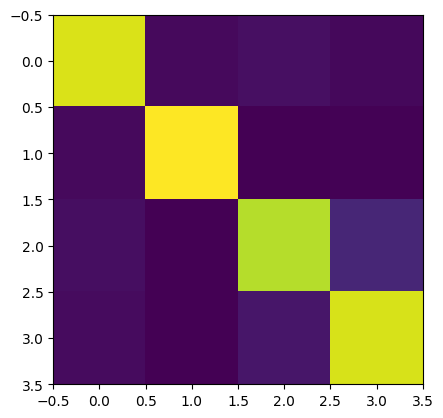

In [17]:
from sklearn.metrics import confusion_matrix
import time
for m in models:
    times = []
    accuracies = []
    for i in range(20):
        start_time = time.time()
        pred = np.argmax(m.predict(X_test, verbose = 0), axis = 1)
        end_time = time.time()
        times.append(end_time-start_time)
        accuracies.append(np.mean((y_test-pred)==0))
    print(f"Mean time: {np.mean(times)}, average accuracy: {np.mean(accuracies)}")
    plt.imshow(confusion_matrix(y_test, pred))
    plt.show()

In [133]:
from larq.quantizers import ste_sign

In [141]:
model6.layers[1]

In [142]:
import larq
from copy import deepcopy


model6.layers[1].set_weights([tf.cast(ste_sign(model6.layers[1].weights[i]), "int8") if i<2 else model6.layers[1].weights[i] for i in range(len(model6.layers[1].weights))])
model6.layers[1].weights

[<tf.Variable 'binary_lstm_9/binary_lstm_cell_15/kernel:0' shape=(32, 512) dtype=float32, numpy=
 array([[ 1., -1.,  1., ..., -1., -1.,  1.],
        [-1.,  1., -1., ...,  1., -1.,  1.],
        [ 1., -1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1., -1., -1., ...,  1.,  1.,  1.],
        [-1.,  1., -1., ...,  1.,  1., -1.],
        [ 1.,  1.,  1., ...,  1., -1.,  1.]], dtype=float32)>,
 <tf.Variable 'binary_lstm_9/binary_lstm_cell_15/recurrent_kernel:0' shape=(128, 512) dtype=float32, numpy=
 array([[ 1., -1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1., -1.,  1.],
        [ 1., -1.,  1., ..., -1., -1.,  1.],
        ...,
        [-1., -1.,  1., ..., -1.,  1.,  1.],
        [-1., -1., -1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32)>,
 <tf.Variable 'binary_lstm_9/binary_lstm_cell_15/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 1.06326127e-02,  1.53889321e-02, -2.37236936e-02, -5.75430766e-02,
        -6.16130047e-02, 

In [145]:
(128*512 + 32*512)*8 + 512*32

671744

In [146]:
(128*512 + 32*512)*32 + 512*32

2637824

In [147]:
((128*512 + 32*512)*32 + 512*32)/((128*512 + 32*512)*8 + 512*32)

3.926829268292683

Mean time: 4.717853546142578, average accuracy: 0.8969736842105264


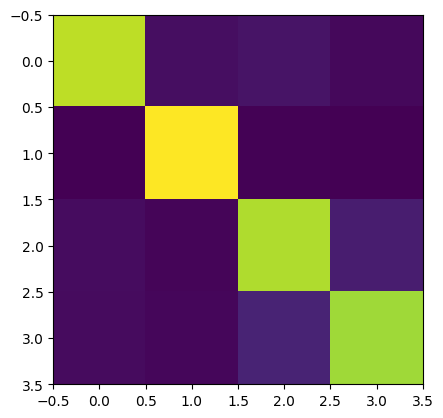

In [143]:
from sklearn.metrics import confusion_matrix
import time
for m in [model6]:
    times = []
    accuracies = []
    for i in range(1):
        start_time = time.time()
        pred = np.argmax(m.predict(X_test, verbose = 0), axis = 1)
        end_time = time.time()
        times.append(end_time-start_time)
        accuracies.append(np.mean((y_test-pred)==0))
    print(f"Mean time: {np.mean(times)}, average accuracy: {np.mean(accuracies)}")
    plt.imshow(confusion_matrix(y_test, pred))
    plt.show()

In [154]:
ste_sign(model6.layers[1].weights[0], dtype ="int8")

TypeError: ste_sign() got an unexpected keyword argument 'dtype'

In [152]:
model6.layers[1].weights[0] = ste_sign(model6.layers[1].weights[0], "int8")
model6.layers[1].weights[0]

<tf.Variable 'binary_lstm_9/binary_lstm_cell_15/kernel:0' shape=(32, 512) dtype=float32, numpy=
array([[ 1., -1.,  1., ..., -1., -1.,  1.],
       [-1.,  1., -1., ...,  1., -1.,  1.],
       [ 1., -1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1., -1., -1., ...,  1.,  1.,  1.],
       [-1.,  1., -1., ...,  1.,  1., -1.],
       [ 1.,  1.,  1., ...,  1., -1.,  1.]], dtype=float32)>

In [117]:
np.max([np.max(a) for a in model4.layers[1].weights])

1.0252484

In [48]:
def keras_model_memory_usage_in_bytes(model, *, batch_size: int, binary = False):
    """
    Return the estimated memory usage of a given Keras model in bytes.
    This includes the model weights and layers, but excludes the dataset.

    The model shapes are multipled by the batch size, but the weights are not.

    Args:
        model: A Keras model.
        batch_size: The batch size you intend to run the model with. If you
            have already specified the batch size in the model itself, then
            pass `1` as the argument here.
    Returns:
        An estimate of the Keras model's memory usage in bytes.

    """
    default_dtype = "int8" if binary else "float32"
    shapes_mem_count = 0
    internal_model_mem_count = 0
    for layer in model.layers:
        if isinstance(layer, tf.keras.Model):
            internal_model_mem_count += keras_model_memory_usage_in_bytes(
                layer, batch_size=batch_size
            )
        single_layer_mem = tf.as_dtype(default_dtype).size
        out_shape = layer.output_shape
        if isinstance(out_shape, list):
            out_shape = out_shape[0]
        for s in out_shape:
            if s is None:
                continue
            single_layer_mem *= s
        shapes_mem_count += single_layer_mem

    trainable_count = sum(
        [tf.keras.backend.count_params(p) for p in model.trainable_weights]
    )
    non_trainable_count = sum(
        [tf.keras.backend.count_params(p) for p in model.non_trainable_weights]
    )

    total_memory = (
        batch_size * shapes_mem_count
        + internal_model_mem_count
        + trainable_count
        + non_trainable_count
    )
    return total_memory



In [49]:
memory_prebinary = keras_model_memory_usage_in_bytes(model4, batch_size=128, binary = False)
memory_prebinary

7237764

In [50]:
import larq
for i in range(len(model4.layers[1].weights)):
    model4.layers[1].weights[i] = tf.cast(larq.math.sign(model4.layers[1].weights[i]), "int8")

In [51]:
memory_postbinary = keras_model_memory_usage_in_bytes(model4, batch_size=128, binary = True)
memory_postbinary

2124420

In [47]:
7237764/2124420

3.406936481486712

In [44]:
model4.layers[1].dtype

'float32'

In [161]:
start = time.time()
for i in range(1100000):
    -1 * 12
print(time.time()-start)  
start = time.time() 
for i in range(1100000):
    1654.15648964945646 * 123
print(time.time()-start)  
start = time.time() 
for i in range(1100000):
    1654 * 123
print(time.time()-start)  

0.041022539138793945
0.03906106948852539
0.0400090217590332
